# HW3 
## T-Test and Confidence Interval


In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### Confidence level is 95% 

In [2]:
confidence_level=0.95

### Null Hypothesis:
#### H0: Mean temperature in Los Angeles from the last 10 years IS NOT significantly warmer than the long-term mean temperature
#### H1: Mean temperature in Los Angeles from the last 10 years IS significantly warmer than the long-term mean temperature

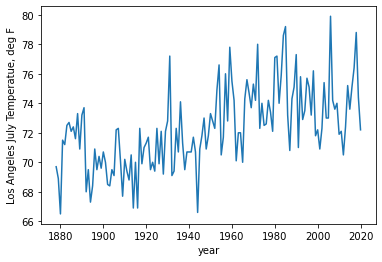

In [3]:
#display historical data of mean July temperature in Los Angeles
df=pd.read_excel("LAmeantempdata.xlsx")
data=df.to_numpy()
temp=data[:,7]
year=data[:,0]
plt.plot(year,temp)
plt.xlabel('year')
plt.ylabel('Los Angeles July Temperatue, deg F');

In [4]:
mu=np.mean(temp)
M=len(temp)
m10=np.mean(temp[M-10:M+1])
s10=np.std(temp[M-10:M+1],ddof=1)
print('The long term mean is '+str(round(mu,2))+' deg F')
print('The last 10 year mean is '+str(round(m10,2))+' deg F')

The long term mean is 72.31 deg F
The last 10 year mean is 74.14 deg F


### Use One-Tail T-test

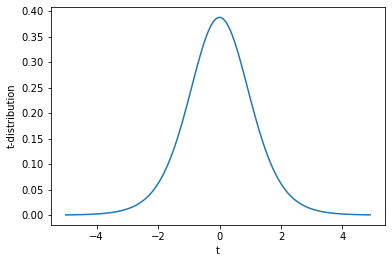

In [5]:
N=10
df=N-1
t=np.arange(-5,5,0.1)
tdist=stats.t.pdf(t,df)
plt.plot(t,tdist)
plt.xlabel('t')
plt.ylabel('t-distribution');

In [6]:
#calculate critical region
tcrit=stats.t.ppf(confidence_level,df)
print('critical t value is ',str(round(tcrit,2)))

critical t value is  1.83


In [7]:
#determine if data is within the critical region
tval=(m10-mu)/(s10/np.sqrt(N-1))
print('t value is ',str(round(tval,2)))

t value is  2.31


In [8]:
tval>tcrit 
#if true, reject null hypothesis

True

### Use two-tail test 

In [17]:
alpha=1-confidence_level
tcrit=stats.t.ppf(1-alpha/2,df)
print('critical t value is ',str(round(tcrit,2)))

critical t value is  2.26


In [10]:
tval>tcrit
#if true, reject null hypothesis

True

## Instruments Testing

In [11]:
x = [9.8, 10.1, 10.2, 9.7, 9.6, 10.5, 10.4, 9.9, 10.2, 10.3]
N=10
myerr=np.random.random(N)-.5 
#true signal
mu=10
#sample=signal+noise
x=mu+5.0*myerr
print(str(x))

[ 8.09893683 11.54723737  9.64159054 10.32701904  7.59941934  9.93415432
 12.34783147  8.58083505 10.20764586  9.99027738]


In [12]:
#calculate mean, standard devaition, standard error, degree of freedom
M=np.mean(x)
s=np.std(x,ddof=1)
SE=s/np.sqrt(N-1)
df=N-1
print('Mean, standard deviation, standard error, degree of freedom:'+str([M,s,SE,df]))


Mean, standard deviation, standard error, degree of freedom:[9.827494719629831, 1.4637273206825518, 0.48790910689418393, 9]


### Standard deviation is the measure of variation between the measurements in our sample.
### Standard error is the average distance between sample mean and true mean

In [13]:
#calculate tcrit and 95% confidence interval
CL=0.95
alpha=1-CL
trcit=stats.t.ppf(1-alpha/2,df)
dx=tcrit*SE
print('The 95% CI on true mean is '+str(M)+'(+/-)'+str(dx))

The 95% CI on true mean is 9.827494719629831(+/-)1.1037270809272384


In [14]:
#calculate tcrit and 99% confidence interval
CL=0.99
alpha=1-CL
trcit=stats.t.ppf(1-alpha/2,df)
dx=tcrit*SE
print('The 99% CI on true mean is '+str(M)+'(+/-)'+str(dx))

The 99% CI on true mean is 9.827494719629831(+/-)1.1037270809272384
